# Introduction

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('doctortrain.csv')

In [3]:
test=pd.read_csv('doctortest.csv')

In [4]:
data.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5959 entries, 0 to 5958
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5959 non-null   object
 1   Experience          5959 non-null   object
 2   Rating              2658 non-null   object
 3   Place               5934 non-null   object
 4   Profile             5959 non-null   object
 5   Miscellaneous_Info  3340 non-null   object
 6   Fees                5959 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.0+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       1987 non-null   object
 1   Experience          1987 non-null   object
 2   Rating              897 non-null    object
 3   Place               1981 non-null   object
 4   Profile             1987 non-null   object
 5   Miscellaneous_Info  1153 non-null   object
dtypes: object(6)
memory usage: 93.3+ KB


In [7]:
data['Fees'].max()

950

In [8]:
data[data['Fees']==950]

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
293,"MBBS, MD - Internal Medicine, FRCP",29 years experience,100%,"Adyar, Chennai",General Medicine,"100% 175 Feedback Adyar, Chennai",950


In [9]:
def changeexperience(x):
    bans=x.split(' ')
    return bans[0]

In [10]:
data['Experience']=data['Experience'].apply(changeexperience)

In [11]:
test['Experience']=test['Experience'].apply(changeexperience)

In [12]:
data.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [13]:
data.drop('Miscellaneous_Info',axis=1,inplace=True)

In [14]:
test.drop('Miscellaneous_Info',axis=1,inplace=True)

In [15]:
def changequali(x):
    bans=x.split(' ')
    sans=x.split(',')
    if ',' not in x:
        return bans[0]
    else:
        return sans[0]

In [16]:
data['Qualification']=data['Qualification'].apply(changequali)

In [17]:
def removeminus(x):
    cabs=x.split('-')
    if '-' in x:
        return cabs[0]
    else:
        return x

In [18]:
data['Qualification']=data['Qualification'].apply(removeminus)

In [19]:
test['Qualification']=test['Qualification'].apply(changequali)

In [20]:
test['Qualification']=test['Qualification'].apply(removeminus)

In [21]:
test['Qualification'].value_counts()

MBBS                                                                   865
BDS                                                                    371
BHMS                                                                   232
BAMS                                                                   228
MD                                                                      74
MDS                                                                     48
MS                                                                      31
MD                                                                      18
MDS                                                                     13
DDVL                                                                    13
DNB                                                                     13
DHMS (Diploma in Homeopathic Medicine and Surgery)                       7
Diploma in Otorhinolaryngology (DLO)                                     6
Get                      

In [22]:
def stillqua(x):
    dab=x.strip('.')
    tab= dab.lower()
    mylist=['bsc','diploma','certifi','doctor']
    if mylist[0] in tab:
        return 'BSC'
    elif mylist[1] in tab:
        return 'Diploma'
    elif mylist[2] in tab:
        return 'Certification'
    elif mylist[3] in tab:
        return 'PhD'
    else:
        return x

In [23]:
test['Qualification']=test['Qualification'].apply(stillqua)

In [24]:
test['Qualification'].value_counts()

MBBS                                         865
BDS                                          371
BHMS                                         232
BAMS                                         228
MD                                            74
MDS                                           48
MS                                            31
Diploma                                       23
MD                                            18
MDS                                           13
DDVL                                          13
DNB                                           13
Get                                            6
B.Sc                                           6
BSC                                            5
LCEH                                           5
MS                                             5
DHMS                                           4
Certification                                  3
DM                                             2
BSAM                

In [25]:
data['Qualification']=data['Qualification'].apply(stillqua)

In [26]:
data[data['Fees']>800]

,Qualification,Experience,Rating,Place,Profile,Fees
275,MD,6,NaN,"Chanakyapuri, Delhi",Dermatologists,900
293,MBBS,29,100%,"Adyar, Chennai",General Medicine,950
986,MBBS,25,93%,"Shalimar Bagh, Delhi",ENT Specialist,900
1313,MBBS,33,100%,"Mira-Bhayandar Road, Mumbai",General Medicine,900
1630,MBBS,6,NaN,"Kandivali West, Mumbai",Dermatologists,900
2163,MBBS,8,100%,"Kandivali West, Mumbai",General Medicine,900
2250,MBBS,46,95%,"Richmond Town, Bangalore",ENT Specialist,900
2391,BHMS,19,100%,"Mulund West, Mumbai",Homeopath,900
2426,MA,6,NaN,"Vasant Kunj, Delhi",Homeopath,900
2520,BHMS,27,98%,"Mulund West, Mumbai",Homeopath,900


In [27]:
data[data['Fees']>800]['Profile'].value_counts()

General Medicine    7
Dermatologists      5
Homeopath           4
ENT Specialist      3
Dentist             1
Ayurveda            1
Name: Profile, dtype: int64

In [28]:
data['Experience']=data['Experience'].astype(int)

In [29]:
test['Experience']=test['Experience'].astype(int)

In [30]:
data['Experience'].max()

66

In [31]:
test['Experience'].max()

65

In [32]:
data[data['Experience']==66]

,Qualification,Experience,Rating,Place,Profile,Fees
372,MBBS,66,NaN,"Greams Road, Chennai",ENT Specialist,100


In [33]:
caps=data[data['Rating'].notnull()]

In [34]:
caps.head()

,Qualification,Experience,Rating,Place,Profile,Fees
0,BHMS,24,100%,"Kakkanad, Ernakulam",Homeopath,100
1,BAMS,12,98%,"Whitefield, Bangalore",Ayurveda,350
4,BAMS,20,100%,"Keelkattalai, Chennai",Ayurveda,250
7,BDS,10,99%,"Arekere, Bangalore",Dentist,200
12,BDS,9,98%,"Coimbatore Racecourse, Coimbatore",Dentist,200


In [35]:
def removepercent(x):
    vans=x.split('%')
    return vans[0]

In [36]:
caps['Rating']=caps['Rating'].apply(removepercent)

c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [37]:
data['Profile'].value_counts()

Dentist             1396
General Medicine    1172
Dermatologists      1034
Homeopath            843
Ayurveda             786
ENT Specialist       728
Name: Profile, dtype: int64

In [38]:
caps['Rating']=caps['Rating'].astype(int)

c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [39]:
def Placeexactly(x):
    wans=str(x).split(' ')
    return wans[-1]

In [40]:
caps.groupby('Profile')['Rating'].mean()

Profile
Ayurveda            96.327957
Dentist             97.706818
Dermatologists      93.506270
ENT Specialist      89.315789
General Medicine    91.592308
Homeopath           96.657692
Name: Rating, dtype: float64

In [41]:
def fillratings(cols):
    Rating = cols[0]
    Profile = cols[1]
    
    if pd.isnull(Rating):

        if Profile == 'Ayurveda':
            return '96%'

        elif Profile == 'Dentist':
            return '98%'
        elif Profile=='Dermatologists':
            return '94%'
        elif Profile=='ENT Specialist':
            return '89%'
        elif Profile=='General Medicine':
            return '92%'
        elif Profile=='Homeopath':
            return '97%'
    else:
        return Rating

In [42]:
data['Rating']=data[['Rating','Profile']].apply(fillratings,axis=1)

In [43]:
baps=test[test['Rating'].notnull()]

In [44]:
baps['Rating']=baps['Rating'].apply(removepercent)

c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [45]:
test['Profile'].value_counts()

General Medicine    444
Dentist             441
Dermatologists      339
Homeopath           277
Ayurveda            251
ENT Specialist      235
Name: Profile, dtype: int64

In [46]:
baps['Rating']=baps['Rating'].astype(int)

c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [47]:
baps.groupby('Profile')['Rating'].mean()

Profile
Ayurveda            96.126984
Dentist             97.674912
Dermatologists      93.263158
ENT Specialist      88.000000
General Medicine    92.871622
Homeopath           96.126437
Name: Rating, dtype: float64

In [48]:
def testfillratings(cols):
    Rating = cols[0]
    Profile = cols[1]
    
    if pd.isnull(Rating):

        if Profile == 'Ayurveda':
            return '96%'

        elif Profile == 'Dentist':
            return '98%'
        elif Profile=='Dermatologists':
            return '93%'
        elif Profile=='ENT Specialist':
            return '88%'
        elif Profile=='General Medicine':
            return '93%'
        elif Profile=='Homeopath':
            return '96%'
    else:
        return Rating

In [49]:
test['Rating']=test[['Rating','Profile']].apply(testfillratings,axis=1)

In [50]:
data['Rating']=data['Rating'].apply(removepercent)

In [51]:
test['Rating']=test['Rating'].apply(removepercent)

In [52]:
data['Rating']=data['Rating'].astype(int)

In [53]:
test['Rating']=test['Rating'].astype(int)

In [54]:
taps=data[data['Place'].notnull()]

In [55]:
taps['Place']=taps['Place'].apply(Placeexactly)

c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [56]:
taps['Place'].value_counts()

Bangalore             1258
Mumbai                1219
Delhi                 1184
Hyderabad              951
Chennai                854
Coimbatore             228
Ernakulam              153
Thiruvananthapuram      86
e                        1
Name: Place, dtype: int64

In [57]:
taps[taps['Place']=='e']

,Qualification,Experience,Rating,Place,Profile,Fees
3978,BDS,23,98,e,Dentist,250


In [58]:
data['Place'].fillna('Malleswaram, Bangalore',inplace=True)

In [59]:
data['Place']=data['Place'].apply(Placeexactly)

In [60]:
def removethee(x):
    if x=='e':
        return 'Bangalore'
    else:
        return x

In [61]:
data['Place']=data['Place'].apply(removethee)

In [62]:
data['Place'].value_counts()

Bangalore             1284
Mumbai                1219
Delhi                 1184
Hyderabad              951
Chennai                854
Coimbatore             228
Ernakulam              153
Thiruvananthapuram      86
Name: Place, dtype: int64

In [63]:
fraps=test[test['Place'].notnull()]

In [64]:
fraps['Place']=fraps['Place'].apply(Placeexactly)

c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [65]:
fraps['Place'].value_counts()

Bangalore             420
Delhi                 417
Mumbai                389
Hyderabad             333
Chennai               287
Coimbatore             70
Ernakulam              48
Thiruvananthapuram     17
Name: Place, dtype: int64

In [66]:
test['Place'].fillna('Malleswaram, Bangalore',inplace=True)

In [67]:
test['Place']=test['Place'].apply(Placeexactly)

In [68]:
test['Place'].value_counts()

Bangalore             426
Delhi                 417
Mumbai                389
Hyderabad             333
Chennai               287
Coimbatore             70
Ernakulam              48
Thiruvananthapuram     17
Name: Place, dtype: int64

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5959 entries, 0 to 5958
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Qualification  5959 non-null   object
 1   Experience     5959 non-null   int32 
 2   Rating         5959 non-null   int32 
 3   Place          5959 non-null   object
 4   Profile        5959 non-null   object
 5   Fees           5959 non-null   int64 
dtypes: int32(2), int64(1), object(3)
memory usage: 232.9+ KB


In [70]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Qualification  1987 non-null   object
 1   Experience     1987 non-null   int32 
 2   Rating         1987 non-null   int32 
 3   Place          1987 non-null   object
 4   Profile        1987 non-null   object
dtypes: int32(2), object(3)
memory usage: 62.2+ KB


# Pre Processing

converting categorical variables to meaningful numbers

we convert ratings first

In [71]:
data[data['Rating']<50]

,Qualification,Experience,Rating,Place,Profile,Fees
55,MBBS,25,36,Bangalore,ENT Specialist,600
692,MBBS,29,33,Delhi,Dermatologists,500
910,Diploma,31,45,Mumbai,Homeopath,500
2583,MRCPCH (UK),19,7,Hyderabad,General Medicine,100
3124,MBBS,38,48,Delhi,ENT Specialist,800
3602,MBBS,33,40,Chennai,General Medicine,700
5026,MBBS,30,47,Bangalore,ENT Specialist,650
5125,MBBS,19,33,Bangalore,ENT Specialist,650


In [72]:
data['Fees'].min()

5

In [73]:
data[data['Fees']==5]

,Qualification,Experience,Rating,Place,Profile,Fees
1929,BDS,6,98,Thiruvananthapuram,Dentist,5


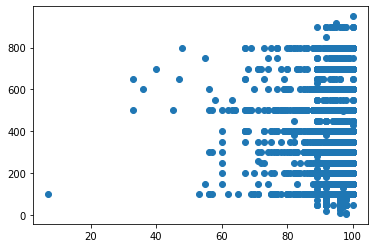

In [74]:
plt.scatter(data['Rating'],data['Fees'])

In [75]:
data.groupby('Place')['Fees'].mean()

Place
Bangalore             324.364486
Chennai               283.583138
Coimbatore            154.298246
Delhi                 362.964527
Ernakulam             188.431373
Hyderabad             307.507886
Mumbai                308.292863
Thiruvananthapuram    167.267442
Name: Fees, dtype: float64

In [76]:
def crat(x):
    if x<=50: #50 because of max rating is 100
        return 1 #because of the meaningful magnitude
    if x>50:
        return 2

In [77]:
data['Rating']=data['Rating'].apply(crat)

In [78]:
test['Rating']=test['Rating'].apply(crat)

In [79]:
data.groupby('Rating')['Fees'].mean()

Rating
1    562.500000
2    307.605108
Name: Fees, dtype: float64

In [80]:
data['Rating'].value_counts(normalize=True)

2    0.998657
1    0.001343
Name: Rating, dtype: float64

In [81]:
def exper(x):
    if x<=33:#33 because the max experience is 66
        return 1 #for meaningful magnitude
    if x>33:
        return 2

In [82]:
data['Experience']=data['Experience'].apply(exper)

In [83]:
test['Experience']=test['Experience'].apply(exper)

In [84]:
data.groupby('Experience')['Fees'].mean()

Experience
1    312.957129
2    267.996988
Name: Fees, dtype: float64

# Transforming Place

In [85]:
data['Place'].value_counts()

Bangalore             1284
Mumbai                1219
Delhi                 1184
Hyderabad              951
Chennai                854
Coimbatore             228
Ernakulam              153
Thiruvananthapuram      86
Name: Place, dtype: int64

then we use target encoding

In [86]:
place=data.groupby('Place')['Fees'].mean()

In [87]:
data['Place']=data['Place'].map(place)

In [88]:
test['Place']=test['Place'].map(place)

In [89]:
data.head()

,Qualification,Experience,Rating,Place,Profile,Fees
0,BHMS,1,2,188.431373,Homeopath,100
1,BAMS,1,2,324.364486,Ayurveda,350
2,MBBS,1,2,324.364486,ENT Specialist,300
3,BSC,1,2,324.364486,Ayurveda,250
4,BAMS,1,2,283.583138,Ayurveda,250


In [90]:
profile=data.groupby('Profile')['Fees'].mean()

In [91]:
data['Profile']=data['Profile'].map(profile)

In [92]:
test['Profile']=test['Profile'].map(profile)

In [93]:
qualification=data.groupby('Qualification')['Fees'].mean()

In [94]:
data['Qualification']=data['Qualification'].map(qualification)

In [95]:
test['Qualification']=test['Qualification'].map(qualification)

<AxesSubplot:>

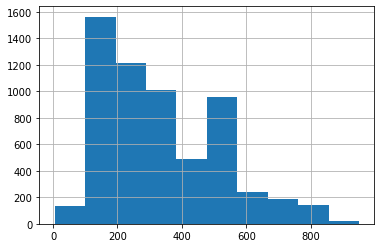

In [96]:
data['Fees'].hist()

In [97]:
data['Fees']=np.log(data['Fees'])

<AxesSubplot:>

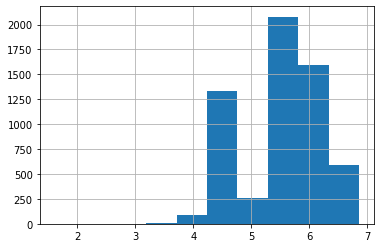

In [98]:
data['Fees'].hist()

# Data Splitting

In [99]:
X=data.drop('Fees',axis=1)
y=data['Fees']

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [102]:
import lightgbm as lgb

In [103]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'eval_metric': 'rmsle',
    'max_depth': 7, 
    'learning_rate': 0.1,
    'verbose': 0, 
    'early_stopping_round': 30}
n_estimators = 700

In [104]:
d_train = lgb.Dataset(X_train, label=y_train)

In [105]:
d_valid = lgb.Dataset(X_test, label=y_test)

In [106]:
watchlist = [d_valid]

In [107]:
model = lgb.train(params, d_train, n_estimators, watchlist, verbose_eval=1)

c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\lightgbm\engine.py:156: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012380 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[1]	valid_0's l2: 0.454741
Training until validation scores don't improve for 30 rounds
[2]	valid_0's l2: 0.442238
[3]	valid_0's l2: 0.432274
[4]	valid_0's l2: 0.42433
[5]	valid_0's l2: 0.418139
[6]	valid_0's l2: 0.41323
[7]	

In [108]:
preds = model.predict(test)

In [109]:
preds = np.exp(preds)

In [110]:
Doctor=pd.DataFrame()

In [111]:
Doctor['Fees']=preds

In [112]:
Doctor.to_csv('doctor.csv',index=False)

In [113]:
Doctor.head()

,Fees
0,160.382545
1,334.180730
2,218.203798
3,231.918316
4,211.310621


In [114]:
prete=model.predict(X_test)

In [115]:
from sklearn.metrics import mean_squared_error

In [116]:
np.sqrt(mean_squared_error(y_test,prete))

0.629173009844873